### Import required libraries

In [1]:

import pymysql
from cryptography.fernet import Fernet
import json
from collections import namedtuple
import time
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import pandas as pd
from sqlalchemy import create_engine 
from sklearn import model_selection
from sklearn.metrics import classification_report as cr
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from yellowbrick.classifier import ClassificationReport
from yellowbrick.features import FeatureImportances

from imblearn.over_sampling import SMOTE 
from collections import Counter
import pickle

%matplotlib inline

### Decrypt Credentials and Connect to Database

In [2]:
#Uncode the secret license file
def unencrypt():
    try:
        key = b'IXx5rHfP15FqP4ahx2pwcud-XmcBzU553Ri6p-nVhnc=' #Fernet.generate_key()
        cipher_suite = Fernet(key)
        with open('/usr/local/etc/musicmood_bytes.bin', 'rb') as file_object:
            for line in file_object:
                encryptedpwd = line
        uncipher_text = (cipher_suite.decrypt(encryptedpwd))
        plain_text_encryptedpassword = bytes(uncipher_text).decode("utf-8") #convert to string
        x = json.loads(plain_text_encryptedpassword, object_hook=lambda d: namedtuple('X', d.keys())(*d.values()))
        return x
    except Exception as e:
        print(str(e))
        return "Error" 

#Setup the database connection
credentials = unencrypt()
user_id = credentials.user
user_password = credentials.password
dbname = credentials.dbname
server = credentials.server
conn = pymysql.connect(server,user_id,user_password,dbname)

### Load the TEST dataset

In [3]:
start_time = time.time()
df = pd.read_sql('SELECT * FROM TEST_DATA', con = conn)
print('--- %s seconds ---' % (time.time() - start_time))

df.describe()
df.head()
print(df.columns)

--- 0.13023686408996582 seconds ---
Index(['﻿trackid', 'song', 'artist', 'year', 'lyrics', 'source', 'duration',
       ' loudness', ' mode', ' time_signature', ' words_song', ' words_genre',
       ' words_second', ' tempo', ' artist_hotttnesss', ' gnr_Blues',
       ' gnr_Country', ' gnr_Folk', ' gnr_Funk',
       ' gnr_House Electronic Trance', ' gnr_Jazz', ' gnr_Latin', ' gnr_Metal',
       ' gnr_Pop', ' gnr_Pop Standards', ' gnr_Punk', ' gnr_Rap Hip Hop',
       ' gnr_Rhythm and Blues', ' gnr_Rock', ' gnr_Rock and Roll',
       ' gnr_Ska Reggae Dancehall', ' key_0', ' key_1', ' key_2', ' key_4',
       ' key_5', ' key_6', ' key_7', ' key_8', ' key_9', ' key_10', ' key_11',
       ' is_top40'],
      dtype='object')


### Visualize only important features (not related with the rankings)

In [5]:
test_data = df.select_dtypes(include=['float64','int64','uint8']).copy()

test_data.drop(['source'], axis=1, inplace=True)
test_data.head()

,duration,loudness,mode,time_signature,words_song,words_genre,words_second,tempo,artist_hotttnesss,gnr_Blues,...,key_2,key_4,key_5,key_6,key_7,key_8,key_9,key_10,key_11,is_top40
0,223,-10.922,1,4,185,222,1,135,0.493990,0,...,0,0,0,0,0,0,0,1,0,1
1,179,-10.837,0,4,256,229,2,91,0.459346,0,...,0,0,0,0,0,0,1,0,0,1
2,301,-6.006,1,4,397,285,2,107,0.469921,0,...,0,0,0,0,0,0,0,0,1,1
3,110,-12.808,1,1,162,263,1,109,0.379651,0,...,0,1,0,0,0,0,0,0,0,1
4,244,-12.575,0,4,302,382,1,104,0.568201,0,...,0,0,0,0,0,0,0,0,0,1


In [6]:
array = test_data.values
X = array[:,0:-1]
Y = array[:,-1] #is_top40

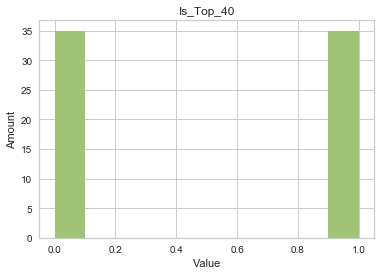

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# the histogram of the data
n, bins, patches = plt.hist(Y, facecolor='g')

plt.xlabel('Value')
plt.ylabel('Amount')
plt.title('Is_Top_40')
plt.grid(True)
plt.show()

### Random Forest Classifier

In [8]:
filename = 'RandomForestClassifier_model.sav'

loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X, Y)
print(result)

predictions = loaded_model.predict(X)
print(accuracy_score(Y, predictions))
print(confusion_matrix(Y, predictions))

/anaconda3/envs/ENV-MusicMood/lib/python3.6/site-packages/sklearn/base.py:311: UserWarning: Trying to unpickle estimator QuantileTransformer from version 0.19.1 when using version 0.19.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/anaconda3/envs/ENV-MusicMood/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d
/anaconda3/envs/ENV-MusicMood/lib/python3.6/site-packages/sklearn/base.py:311: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.19.1 when using version 0.19.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/anaconda3/envs/ENV-MusicMood/lib/python3.6/site-packages/sklearn/base.py:311: UserWarning: Trying to unpickle estimator RandomForestClassifier from vers

0.6285714285714286
0.6285714285714286
[[23 12]
 [14 21]]


### Logistic Regression

In [9]:
filename = 'LogisticRegression_model.sav'

loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X, Y)
print(result)

predictions = loaded_model.predict(X)
print(accuracy_score(Y, predictions))
print(confusion_matrix(Y, predictions))

0.5285714285714286
0.5285714285714286
[[17 18]
 [15 20]]


/anaconda3/envs/ENV-MusicMood/lib/python3.6/site-packages/sklearn/base.py:311: UserWarning: Trying to unpickle estimator QuantileTransformer from version 0.19.1 when using version 0.19.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/anaconda3/envs/ENV-MusicMood/lib/python3.6/site-packages/sklearn/base.py:311: UserWarning: Trying to unpickle estimator LogisticRegression from version 0.19.1 when using version 0.19.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/anaconda3/envs/ENV-MusicMood/lib/python3.6/site-packages/sklearn/base.py:311: UserWarning: Trying to unpickle estimator Pipeline from version 0.19.1 when using version 0.19.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


### AdaBoost Classifier

In [10]:
filename = 'AdaBoostClassifier_model.sav'

loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X, Y)
print(result)

predictions = loaded_model.predict(X)
print(accuracy_score(Y, predictions))
print(confusion_matrix(Y, predictions))

0.5428571428571428
0.5428571428571428
[[15 20]
 [12 23]]


/anaconda3/envs/ENV-MusicMood/lib/python3.6/site-packages/sklearn/base.py:311: UserWarning: Trying to unpickle estimator QuantileTransformer from version 0.19.1 when using version 0.19.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/anaconda3/envs/ENV-MusicMood/lib/python3.6/site-packages/sklearn/base.py:311: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.19.1 when using version 0.19.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/anaconda3/envs/ENV-MusicMood/lib/python3.6/site-packages/sklearn/base.py:311: UserWarning: Trying to unpickle estimator AdaBoostClassifier from version 0.19.1 when using version 0.19.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/anaconda3/envs/ENV-MusicMood/lib/python3.6/site-packages/sklearn/base.py:311: UserWarning: Trying to unpickle estimator Pipeline from version 0.19.1 when using ver